Fundamentos de BigData na prática

In [ ]:
# Interagindo com os dados no colab
import pandas as pd
DATA_PATH="/content/data_labs/"
try:
  df_clientes = pd.read_csv(DATA_PATH + "clientes.csv")
  df_vendas = pd.read_csv(DATA_PATH + "vendas.csv")
  print("Arquivos carregados com sucesso")
except FileNotFoundError:
  print("Arquivo não encontrado")



Arquivos carregados com sucesso


In [ ]:
# Interagindo com dados do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH="/content/drive/MyDrive/curso_hadoop/"
try:
  df_clientes = pd.read_csv(DATA_PATH + "clientes.csv")
  df_vendas = pd.read_csv(DATA_PATH + "vendas.csv")
  print("Arquivos carregados com sucesso")
except FileNotFoundError:
  print("Arquivo não encontrado")

Arquivos carregados com sucesso


In [ ]:
print(" -- Clientes -- ")
print(df_clientes.head())
print(" -- Vendas -- ")
print(df_vendas.head())

 -- Clientes -- 
   cliente_id                       nome                        email  \
0        1044  Sra. Maria Luísa Monteiro  maria-cecilia44@example.com   
1        1004                 Ísis Lopes           enzo04@example.org   
2        1564           Leandro da Costa   alicedas-neves@example.net   
3        1664            Cecilia Azevedo       fernanda33@example.org   
4        1199              Alice Rezende         lbarbosa@example.com   

             cidade estado  
0  Fonseca do Oeste     AL  
1         das Neves     PB  
2    Duarte de Lima     PR  
3         Fernandes     MG  
4     Rios do Oeste     MG  
 -- Vendas -- 
   venda_id           data_venda  cliente_id  produto_id  quantidade  \
0     50001  2023-02-27 03:22:00        1772         203           2   
1     50002  2023-12-19 21:15:00        1478         207           4   
2     50003  2023-02-03 08:10:00        1385         111           3   
3     50004  2023-10-31 11:53:00        1700         165           

In [ ]:
print(df_clientes.dtypes)
print(df_vendas.dtypes)

cliente_id     int64
nome          object
email         object
cidade        object
estado        object
dtype: object
venda_id         int64
data_venda      object
cliente_id       int64
produto_id       int64
quantidade       int64
preco_total    float64
dtype: object


In [ ]:
print("-- Informações dos clientes ")
df_clientes.info()
print("-- Informações das vendas ")
df_vendas.info()


-- Informações dos clientes 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cliente_id  500 non-null    int64 
 1   nome        500 non-null    object
 2   email       500 non-null    object
 3   cidade      500 non-null    object
 4   estado      500 non-null    object
dtypes: int64(1), object(4)
memory usage: 19.7+ KB
-- Informações das vendas 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   venda_id     10000 non-null  int64  
 1   data_venda   10000 non-null  object 
 2   cliente_id   10000 non-null  int64  
 3   produto_id   10000 non-null  int64  
 4   quantidade   10000 non-null  int64  
 5   preco_total  10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
print("Clientes")
total_clientes = df_clientes['cliente_id'].nunique()
print(f"Total de clientes:{total_clientes}")
print("Vendas")
valor_medio_venda = df_vendas['preco_total'].mean()
print(f"Valor médio das vendas: {valor_medio_venda: .2f}")

Clientes
Total de clientes:500
Vendas
Valor médio das vendas:  1479.02


1. Configurando as Variáveis de Ambiente

In [ ]:
import os
import subprocess

# Encontrar o caminho correto do JAVA_HOME
java_home_result = subprocess.run(['update-alternatives', '--query', 'java'], capture_output=True, text=True)
java_path = java_home_result.stdout.split('Best: ')[1].split('\n')[0]
java_home = os.path.dirname(os.path.dirname(java_path))

print(f"JAVA_HOME detectado: {java_home}")

# Configurar as variáveis de ambiente
os.environ["JAVA_HOME"] = java_home
os.environ["HADOOP_HOME"] = "/content/hadoop-3.2.1"
os.environ["PATH"] = os.environ["PATH"] + ":/content/hadoop-3.2.1/bin:/content/hadoop-3.2.1/sbin"

print(f"\n✅ Variáveis de ambiente configuradas:")
print(f"   JAVA_HOME: {os.environ['JAVA_HOME']}")
print(f"   HADOOP_HOME: {os.environ['HADOOP_HOME']}")

JAVA_HOME detectado: /usr/lib/jvm/java-17-openjdk-amd64

✅ Variáveis de ambiente configuradas:
   JAVA_HOME: /usr/lib/jvm/java-17-openjdk-amd64
   HADOOP_HOME: /content/hadoop-3.2.1


2. Instalando o Hadoop

In [ ]:
# Passo 1: Baixar o Hadoop
!wget -q https://archive.apache.org/dist/hadoop/common/hadoop-3.2.1/hadoop-3.2.1.tar.gz

# Passo 2: Extrair o arquivo
!tar -xzf hadoop-3.2.1.tar.gz -C /content/

# Passo 3: Criar links simbólicos para os binários
!ln -sf /content/hadoop-3.2.1/bin/* /usr/bin/ 2>/dev/null
!ln -sf /content/hadoop-3.2.1/sbin/* /usr/bin/ 2>/dev/null

print("✅ Hadoop instalado com sucesso!")

✅ Hadoop instalado com sucesso!


3. Configurando o Hadoop


In [ ]:
# Configurar core-site.xml
core_site_xml = """<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<configuration>
    <property>
        <name>fs.defaultFS</name>
        <value>hdfs://localhost:9000</value>
    </property>
</configuration>"""

with open("/content/hadoop-3.2.1/etc/hadoop/core-site.xml", "w") as f:
    f.write(core_site_xml)

print("✅ core-site.xml configurado")

✅ core-site.xml configurado


In [ ]:
# Configurar hdfs-site.xml
hdfs_site_xml = """<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<configuration>
    <property>
        <name>dfs.replication</name>
        <value>1</value>
    </property>
    <property>
        <name>dfs.namenode.name.dir</name>
        <value>/content/hadoop_data/namenode</value>
    </property>
    <property>
        <name>dfs.datanode.data.dir</name>
        <value>/content/hadoop_data/datanode</value>
    </property>
</configuration>"""

with open("/content/hadoop-3.2.1/etc/hadoop/hdfs-site.xml", "w") as f:
    f.write(hdfs_site_xml)

print("✅ hdfs-site.xml configurado")

✅ hdfs-site.xml configurado


In [ ]:
# Configurar hadoop-env.sh para incluir JAVA_HOME
hadoop_env_path = "/content/hadoop-3.2.1/etc/hadoop/hadoop-env.sh"

with open(hadoop_env_path, "r") as f:
    content = f.read()

# Substituir a linha de JAVA_HOME se existir, ou adicionar no final
if "export JAVA_HOME" in content:
    content = content.replace(
        "export JAVA_HOME=${JAVA_HOME}",
        f"export JAVA_HOME={os.environ['JAVA_HOME']}"
    )
else:
    content += f"\nexport JAVA_HOME={os.environ['JAVA_HOME']}\n"

with open(hadoop_env_path, "w") as f:
    f.write(content)

print("✅ hadoop-env.sh configurado com JAVA_HOME")

✅ hadoop-env.sh configurado com JAVA_HOME


4. Criando os diretórios de trabalho no Hadoop

In [ ]:
# Criar os diretórios de dados do Hadoop
!mkdir -p /content/hadoop_data/namenode
!mkdir -p /content/hadoop_data/datanode

print("✅ Diretórios de dados criados")

✅ Diretórios de dados criados


5. Formatando e iniciando o HDFS

In [ ]:
# Definir JAVA_HOME para o comando
import os
env = os.environ.copy()
env["JAVA_HOME"] = os.environ["JAVA_HOME"]
env["HADOOP_HOME"] = os.environ["HADOOP_HOME"]

# Formatar o NameNode
!export JAVA_HOME={os.environ['JAVA_HOME']} && /content/hadoop-3.2.1/bin/hdfs namenode -format -force

print("✅ NameNode formatado com sucesso!")

2026-02-09 22:24:58,332 INFO namenode.NameNode: STARTUP_MSG: 
/************************************************************
STARTUP_MSG: Starting NameNode
STARTUP_MSG:   host = 294492ea90ac/172.28.0.12
STARTUP_MSG:   args = [-format, -force]
STARTUP_MSG:   version = 3.2.1
STARTUP_MSG:   classpath = /content/hadoop-3.2.1/etc/hadoop:/content/hadoop-3.2.1/share/hadoop/common/lib/error_prone_annotations-2.2.0.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/commons-net-3.6.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jaxb-api-2.2.11.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jetty-http-9.3.24.v20180605.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jersey-json-1.19.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/j2objc-annotations-1.1.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/jackson-core-asl-1.9.13.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/failureaccess-1.0.jar:/content/hadoop-3.2.1/share/hadoop/common/lib/listenablefuture-9999.0-empty-to-avoid-conflict-w

6. Trabalhando com o HDFS

In [ ]:
%%bash
set -e

JAVA_BIN="$(readlink -f "$(which java)")"
export JAVA_HOME="$(dirname "$(dirname "$JAVA_BIN")")"

export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"

echo "JAVA_HOME=$JAVA_HOME"

$HADOOP_HOME/bin/hdfs --daemon start namenode
$HADOOP_HOME/bin/hdfs --daemon start datanode
$HADOOP_HOME/bin/hdfs --daemon start secondarynamenode

jps

echo ""
echo "✅ HDFS iniciado!"


JAVA_HOME=/usr/lib/jvm/java-17-openjdk-amd64
9808 DataNode
9904 Jps
9730 NameNode
9869 SecondaryNameNode

✅ HDFS iniciado!


In [ ]:
!jps

9808 DataNode
9730 NameNode
10163 Jps
9869 SecondaryNameNode


In [ ]:
# 1. Criar um diretório para nossos datasets
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -mkdir -p /user/ecommerce/datasets

print("✅ Diretório criado no HDFS")

✅ Diretório criado no HDFS


In [ ]:
# 2. Listar o conteúdo do diretório raiz do HDFS
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -ls /user/ecommerce/datasets

Found 3 items
-rw-r--r--   1 root supergroup      30842 2026-02-09 22:35 /user/ecommerce/datasets/clientes.csv
-rw-r--r--   1 root supergroup       8217 2026-02-09 22:35 /user/ecommerce/datasets/produtos.csv
-rw-r--r--   1 root supergroup     443004 2026-02-09 22:35 /user/ecommerce/datasets/vendas.csv


In [ ]:
DATA_PATH="/content/drive/MyDrive/curso_hadoop/"
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -put $DATA_PATH/clientes.csv /user/ecommerce/datasets/clientes.csv
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -put $DATA_PATH/vendas.csv /user/ecommerce/datasets/vendas.csv
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -put $DATA_PATH/produtos.csv /user/ecommerce/datasets/produtos.csv

print("✅ Arquivos copiados para o HDFS")

2026-02-09 22:34:59,610 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2026-02-09 22:35:02,996 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2026-02-09 22:35:06,343 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
✅ Arquivos copiados para o HDFS


In [ ]:
# Visualizar as linhas de um arquivo
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -cat /user/ecommerce/datasets/clientes.csv | head -n 5

2026-02-09 22:36:57,266 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
cliente_id,nome,email,cidade,estado
1044,Sra. Maria Luísa Monteiro,maria-cecilia44@example.com,Fonseca do Oeste,AL
1004,Ísis Lopes,enzo04@example.org,das Neves,PB
1564,Leandro da Costa,alicedas-neves@example.net,Duarte de Lima,PR
1664,Cecilia Azevedo,fernanda33@example.org,Fernandes,MG


7. Haddop MapReduce

In [ ]:
# Criar um arquivo de texto de exemplo
!echo "hello world big data hello hadoop spark big data" > exemplo.txt

# Enviar para o HDFS
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -put exemplo.txt /user/ecommerce/
# Map: Transforma cada palavra em (palavra, 1)
# Reduce: Soma as contagens para cada palavra
!export JAVA_HOME={os.environ['JAVA_HOME']} && hdfs dfs -cat /user/ecommerce/exemplo.txt | tr ' ' '\n' | sort | uniq -c

print("\n✅ Simulação de MapReduce concluída!")

2026-02-09 22:40:18,643 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
2026-02-09 22:40:21,359 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false
      2 big
      2 data
      1 hadoop
      2 hello
      1 spark
      1 world

✅ Simulação de MapReduce concluída!


In [ ]:
%%bash
set -e
cat > /content/mapper_vendas_por_dia.py << 'PY'
#!/usr/bin/env python3
import sys, csv
reader = csv.DictReader(sys.stdin)
for row in reader:
    # data_venda: "YYYY-MM-DD HH:MM:SS" -> pega só a data
    dia = row["data_venda"].split(" ")[0].strip()
    total = float(row["preco_total"])
    print(f"{dia}\t{total}")
PY

cat > /content/reducer_soma.py << 'PY'
#!/usr/bin/env python3
import sys
current = None
acc = 0.0
for line in sys.stdin:
    key, val = line.rstrip("\n").split("\t", 1)
    val = float(val)
    if current is None:
        current = key
    if key != current:
        print(f"{current}\t{acc:.2f}")
        current = key
        acc = 0.0
    acc += val
if current is not None:
    print(f"{current}\t{acc:.2f}")
PY

chmod +x /content/mapper_vendas_por_dia.py /content/reducer_soma.py


In [ ]:
%%bash
set -e
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"
export STREAMING_JAR="$(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar | head -n 1)"

OUT="/user/ecommerce/output/vendas_por_dia"
hdfs dfs -rm -r -f "$OUT" >/dev/null 2>&1 || true

# roda o job e joga logs fora
hadoop jar "$STREAMING_JAR" \
  -D mapreduce.job.name="vendas_por_dia" \
  -input  /user/ecommerce/datasets/vendas.csv \
  -output "$OUT" \
  -mapper  /content/mapper_vendas_por_dia.py \
  -reducer /content/reducer_soma.py \
  -file /content/mapper_vendas_por_dia.py \
  -file /content/reducer_soma.py \
  2>/dev/null

echo "---- primeiras 10 linhas ----"
hdfs dfs -text "$OUT/part-00000" 2>/dev/null | sed -n '1,10p'

packageJobJar: [/content/mapper_vendas_por_dia.py, /content/reducer_soma.py] [] /tmp/streamjob14098297421638973387.jar tmpDir=null
---- primeiras 10 linhas ----
2023-01-01	36593.58
2023-01-02	33783.34
2023-01-03	41830.97
2023-01-04	53468.76
2023-01-05	45943.83
2023-01-06	40504.86
2023-01-07	48240.78
2023-01-08	43859.53
2023-01-09	44225.04
2023-01-10	56103.62


In [ ]:
%%bash
set -e

cat > /content/mapper_faturamento_estado.py << 'PY'
#!/usr/bin/env python3
import sys, csv, glob, os

def achar_arquivo_clientes():
    # tentativa 1: nome padrão
    if os.path.exists("clientes.csv"):
        return "clientes.csv"

    # tentativa 2: qualquer csv no diretório de trabalho com header de clientes
    for f in glob.glob("*.csv"):
        try:
            with open(f, "r", encoding="utf-8", newline="") as fp:
                header = fp.readline().strip().lower()
                if "cliente_id" in header and "estado" in header and "email" in header:
                    return f
        except Exception:
            pass

    raise FileNotFoundError("Não achei clientes.csv (nem outro CSV com colunas cliente_id/estado/email) no diretório do mapper.")

clientes_file = achar_arquivo_clientes()

estado_por_cliente = {}
with open(clientes_file, newline="", encoding="utf-8") as f:
    r = csv.DictReader(f)
    for row in r:
        estado_por_cliente[str(row["cliente_id"])] = row["estado"].strip()

reader = csv.DictReader(sys.stdin)
for row in reader:
    cid = str(row["cliente_id"])
    estado = estado_por_cliente.get(cid, "??")
    total = float(row["preco_total"])
    print(f"{estado}\t{total}")
PY

chmod +x /content/mapper_faturamento_estado.py

In [ ]:
%%bash
set -e
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"

# baixa do HDFS para o filesystem local do Colab
hdfs dfs -get -f /user/ecommerce/datasets/clientes.csv /content/clientes.csv

# confirma que existe
ls -lh /content/clientes.csv
head -n 2 /content/clientes.csv

-rw-r--r-- 1 root root 31K Feb  9 22:52 /content/clientes.csv
cliente_id,nome,email,cidade,estado
1044,Sra. Maria Luísa Monteiro,maria-cecilia44@example.com,Fonseca do Oeste,AL


2026-02-09 22:52:45,521 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false


In [ ]:
%%bash
set +e
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"
export STREAMING_JAR="$(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar | head -n 1)"

OUT="/user/ecommerce/output/faturamento_por_estado"
hdfs dfs -rm -r -f "$OUT" >/dev/null 2>&1 || true

hadoop jar "$STREAMING_JAR" \
  -D mapreduce.job.name="faturamento_por_estado" \
  -input  /user/ecommerce/datasets/vendas.csv \
  -output "$OUT" \
  -mapper  /content/mapper_faturamento_estado.py \
  -reducer /content/reducer_soma.py \
  -file /content/mapper_faturamento_estado.py \
  -file /content/reducer_soma.py \
  -file /content/clientes.csv \
  2>&1 | tail -n 60

EC=${PIPESTATUS[0]}
echo ""
echo "EXIT_CODE=$EC"

if [ "$EC" -eq 0 ]; then
  echo ""
  echo -e "TOTAL\tESTADO (Top 10)"
  hdfs dfs -text "$OUT/part-00000" | awk -F'\t' '{print $2"\t"$1}' | sort -nr | head -n 10
else
  echo ""
  echo "Job falhou. Vamos listar logs do HDFS output:"
  hdfs dfs -ls "$OUT" 2>/dev/null || true
fi

		Failed Shuffles=0
		Merged Map outputs=1
		GC time elapsed (ms)=0
		Total committed heap usage (bytes)=146800640
	Shuffle Errors
		BAD_ID=0
		CONNECTION=0
		IO_ERROR=0
		WRONG_LENGTH=0
		WRONG_MAP=0
		WRONG_REDUCE=0
	File Output Format Counters 
		Bytes Written=351
2026-02-09 22:54:22,960 INFO mapred.LocalJobRunner: Finishing task: attempt_local1242444246_0001_r_000000_0
2026-02-09 22:54:22,961 INFO mapred.LocalJobRunner: reduce task executor complete.
2026-02-09 22:54:23,819 INFO mapreduce.Job:  map 100% reduce 100%
2026-02-09 22:54:23,820 INFO mapreduce.Job: Job job_local1242444246_0001 completed successfully
2026-02-09 22:54:23,830 INFO mapreduce.Job: Counters: 36
	File System Counters
		FILE: Number of bytes read=333948
		FILE: Number of bytes written=1513459
		FILE: Number of read operations=0
		FILE: Number of large read operations=0
		FILE: Number of write operations=0
		HDFS: Number of bytes read=886008
		HDFS: Number of bytes written=351
		HDFS: Number of read operations=15


2026-02-09 22:54:26,367 INFO sasl.SaslDataTransferClient: SASL encryption trust check: localHostTrusted = false, remoteHostTrusted = false


In [ ]:
%%bash
set -e
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"
export STREAMING_JAR="$(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar | head -n 1)"
echo "OK: $STREAMING_JAR"
hdfs dfs -ls /user/ecommerce/datasets | head


OK: /content/hadoop-3.2.1/share/hadoop/tools/lib/hadoop-streaming-3.2.1.jar
Found 3 items
-rw-r--r--   1 root supergroup      30842 2026-02-09 22:35 /user/ecommerce/datasets/clientes.csv
-rw-r--r--   1 root supergroup       8217 2026-02-09 22:35 /user/ecommerce/datasets/produtos.csv
-rw-r--r--   1 root supergroup     443004 2026-02-09 22:35 /user/ecommerce/datasets/vendas.csv


In [ ]:
%%bash
set -e

cat > /content/mapper_faturamento_produto.py << 'PY'
#!/usr/bin/env python3
import sys, csv, os

# acha produtos.csv no diretório do task
prod_file = "produtos.csv"
if not os.path.exists(prod_file):
    # fallback: tenta achar qualquer arquivo que tenha header com produto_id
    import glob
    for f in glob.glob("*.csv"):
        with open(f, "r", encoding="utf-8", newline="") as fp:
            h = fp.readline().lower()
            if "produto_id" in h and ("categoria" in h or "nome" in h):
                prod_file = f
                break

prod = {}
with open(prod_file, newline="", encoding="utf-8") as f:
    r = csv.DictReader(f)
    for row in r:
        prod[str(row["produto_id"])] = row.get("nome") or row.get("produto") or row.get("descricao") or str(row["produto_id"])

reader = csv.DictReader(sys.stdin)
for row in reader:
    pid = str(row["produto_id"])
    nome = prod.get(pid, f"produto_{pid}")
    total = float(row["preco_total"])
    print(f"{nome}\t{total}")
PY

cat > /content/reducer_soma.py << 'PY'
#!/usr/bin/env python3
import sys

cur = None
acc = 0.0

for line in sys.stdin:
    key, val = line.rstrip("\n").split("\t", 1)
    v = float(val)
    if cur is None:
        cur = key
    if key != cur:
        print(f"{cur}\t{acc:.2f}")
        cur = key
        acc = 0.0
    acc += v

if cur is not None:
    print(f"{cur}\t{acc:.2f}")
PY

chmod +x /content/mapper_faturamento_produto.py /content/reducer_soma.py

In [ ]:
%%bash
set -e
export HADOOP_HOME="/content/hadoop-3.2.1"
export PATH="$PATH:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"
export STREAMING_JAR="$(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar | head -n 1)"

OUT="/user/ecommerce/output/faturamento_por_produto"
hdfs dfs -rm -r -f "$OUT" >/dev/null 2>&1 || true

hadoop jar "$STREAMING_JAR" \
  -D mapreduce.job.name="faturamento_por_produto" \
  -input  /user/ecommerce/datasets/vendas.csv \
  -output "$OUT" \
  -mapper  /content/mapper_faturamento_produto.py \
  -reducer /content/reducer_soma.py \
  -file /content/mapper_faturamento_produto.py \
  -file /content/reducer_soma.py \
  -file /content/data_labs/produtos.csv

echo -e "TOTAL\tPRODUTO (Top 10)"
hdfs dfs -text "$OUT/part-00000" \
| awk -F'\t' '{print $2"\t"$1}' \
| sort -nr \
| head -n 10

packageJobJar: [/content/mapper_faturamento_produto.py, /content/reducer_soma.py, /content/data_labs/produtos.csv] [] /tmp/streamjob5087079438614479828.jar tmpDir=null
TOTAL	PRODUTO (Top 10)
184214.52	288
183364.60	218
180946.24	233
177756.88	285
176172.70	278
173881.75	190
166380.63	241
161673.84	201
159265.86	265
156426.78	259


2026-02-09 23:00:38,508 WARN streaming.StreamJob: -file option is deprecated, please use generic option -files instead.
2026-02-09 23:00:40,050 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2026-02-09 23:00:40,236 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2026-02-09 23:00:40,236 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2026-02-09 23:00:40,256 WARN impl.MetricsSystemImpl: JobTracker metrics system already initialized!
2026-02-09 23:00:40,513 INFO mapred.FileInputFormat: Total input files to process : 1
2026-02-09 23:00:40,573 INFO mapreduce.JobSubmitter: number of splits:1
2026-02-09 23:00:40,974 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1167531304_0001
2026-02-09 23:00:40,975 INFO mapreduce.JobSubmitter: Executing with tokens: []
2026-02-09 23:00:41,284 INFO mapred.LocalDistributedCacheManager: Localized file:/content/mapper_faturamento_produto.py as file:/tmp/hadoop-root/mapr

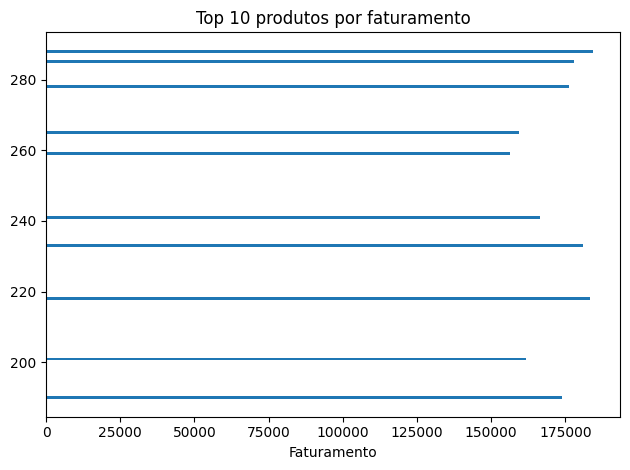

In [ ]:
import pandas as pd
import subprocess, io
from matplotlib import pyplot as plt

OUT = "/user/ecommerce/output/faturamento_por_produto/part-00000"
txt = subprocess.check_output(["hdfs","dfs","-text",OUT], text=True)

df = pd.read_csv(io.StringIO(txt), sep="\t", header=None, names=["produto","faturamento"])
df["faturamento"] = pd.to_numeric(df["faturamento"], errors="coerce")
top = df.sort_values("faturamento", ascending=False).head(10)

plt.figure()
plt.barh(top["produto"][::-1], top["faturamento"][::-1])
plt.title("Top 10 produtos por faturamento")
plt.xlabel("Faturamento")
plt.tight_layout()
plt.show()

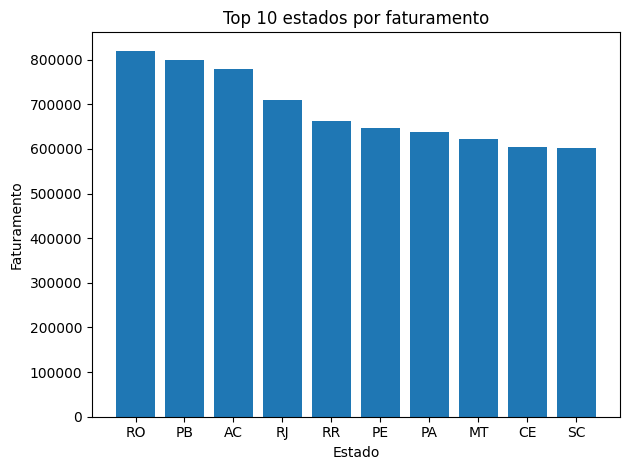

In [ ]:
import pandas as pd
import subprocess, io
from matplotlib import pyplot as plt

OUT = "/user/ecommerce/output/faturamento_por_estado/part-00000"
txt = subprocess.check_output(["hdfs","dfs","-text",OUT], text=True)

df = pd.read_csv(io.StringIO(txt), sep="\t", header=None, names=["estado","faturamento"])
df["faturamento"] = pd.to_numeric(df["faturamento"], errors="coerce")
top = df.sort_values("faturamento", ascending=False).head(10)

plt.figure()
plt.bar(top["estado"], top["faturamento"])
plt.title("Top 10 estados por faturamento")
plt.xlabel("Estado")
plt.ylabel("Faturamento")
plt.tight_layout()
plt.show()


# Exercício - Laboratório prático
### Faturamento por categoria do produto
1. Criar um map de produto segmentando categoria e preço
2. faça um reducer de soma por categoria
3. Exiba o top 5 (head -n 5) de categoras
4. Gere um gráfico (pode ser o de barras ou um de sua escolha) com as 5 categorias mais caras

(Lembrando, é apenas um exemplo, visto que não somariamos preço de categorias, olhariamos talvez média por categoria ou cruzariamos vendas por categoria, mas é mais um exercicio para vocês testarem o conhecimento)

Onde ver mais gráficos e informações:

[MatPLotLib](https://matplotlib.org/)

[Pandas](https://pandas.pydata.org/docs/user_guide/visualization.html)

[Seaborn](https://seaborn.pydata.org/)

Exercicio 2, fazer o mesmo com um dataset de sua preferencia, alguns exemplos:
- https://data.gov/
- https://data.worldbank.org/
- https://opendata.cityofnewyork.us/
